## Lab 4 - Plotting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = sm.datasets
import seaborn as sns

In [17]:
# Download reported crime data from 2019

def get_data_chicago(id):
    '''
    Connect to the chicago data portal API and returns a dataframe
    '''
    
    url = f'https://data.cityofchicago.org/api/views/{id}/rows.csv?accessType=DOWNLOAD'
    df = pd.read_csv(url)

    
    return df

In [ ]:
crimes2019 = get_data_chicago('w98m-zvie')
crimes2020 = get_data_chicago('qzdf-xmn8')

crimes = pd.concat([crimes2019, crimes2020])

crimes = crimes[['ID', 'Date', 'Primary Type', 'FBI Code', 
        'Arrest', 'Community Area', 'Year','Location']]

crimes.head()

In [ ]:
#Chicago community areas dataset
comm_areas = get_data_chicago('igwz-8jzy')

#select only relevant columns
comm_areas = comm_areas[['COMMUNITY', 'AREA_NUMBE']]

print(comm_areas.shape)
comm_areas.head()

In [69]:
#merge crime df and community areas df
merged = crimes.merge(comm_areas, left_on="Community Area", 
                      right_on="AREA_NUMBE", how="inner")
print(merged.shape)
merged.head()

(428382, 24)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY,AREA_NUMBE
0,12202211,JD409555,12/13/2019 08:00:00 AM,032XX S HALSTED ST,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,...,07,NaN,NaN,2019,10/25/2020 03:52:01 PM,NaN,NaN,NaN,BRIDGEPORT,60
1,12201545,JD408228,05/17/2019 03:40:00 PM,008XX W 31st st,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,...,11,NaN,NaN,2019,10/24/2020 03:51:49 PM,NaN,NaN,NaN,BRIDGEPORT,60
2,11660525,JC230676,04/19/2019 06:17:00 PM,032XX S MORGAN ST,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,False,...,14,1170176.0,1883245.0,2019,09/28/2020 03:47:51 PM,41.835116,-87.651071,"(41.835116429, -87.651071215)",BRIDGEPORT,60
3,11853725,JC464040,10/07/2019 09:07:00 PM,032XX S MORGAN ST,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,...,04B,1170173.0,1883368.0,2019,08/10/2020 03:50:37 PM,41.835454,-87.651079,"(41.835454018, -87.651078638)",BRIDGEPORT,60
4,12127352,JD322512,12/18/2019 08:00:00 AM,029XX S CANAL ST,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,...,06,1173769.0,1885374.0,2019,08/09/2020 03:47:44 PM,41.840880,-87.637824,"(41.840879515, -87.637824245)",BRIDGEPORT,60


In [72]:
count_by_community = merged.groupby(['COMMUNITY','Primary Type']).size().to_frame('COUNT').reset_index()
count_by_community.head()

,COMMUNITY,Primary Type,COUNT
0,ALBANY PARK,ARSON,8
1,ALBANY PARK,ASSAULT,307
2,ALBANY PARK,BATTERY,672
3,ALBANY PARK,BURGLARY,171
4,ALBANY PARK,CONCEALED CARRY LICENSE VIOLATION,1


In [65]:
hyde_park = count_by_community[count_by_community['COMMUNITY']=='HYDE PARK']
hyde_park.sort_values('COUNT', ascending=False, inplace=True)

/Users/ezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


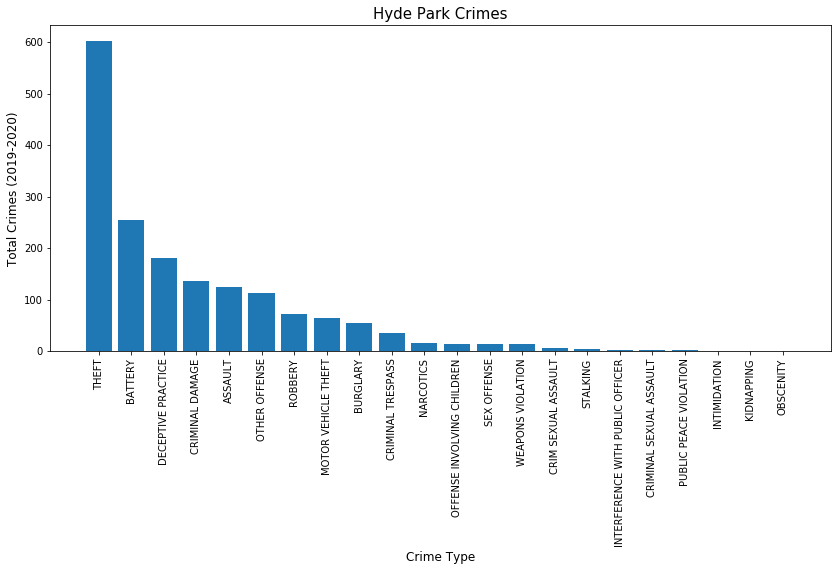

<Figure size 432x288 with 0 Axes>

In [66]:
fig, ax = plt.subplots(figsize=(14,6))

ax.bar(hyde_park['Primary Type'], hyde_park['COUNT'])
ax.set_title('Hyde Park Crimes', fontsize=15)
ax.set_ylabel('Total Crimes (2019-2020)', fontsize=12);
ax.set_xlabel('Crime Type', fontsize=12);
ax.set_xticklabels(hyde_park['Primary Type'], rotation=90)

plt.show()
plt.savefig('hyde_park_crimes.png')

In [94]:
by_year = merged.groupby(['Primary Type', 'Year']).size().to_frame('COUNT').reset_index()
by_year['Year'] = by_year['Year'].astype(str)
by_year.head()

,Primary Type,Year,COUNT
0,ARSON,2019,375
1,ARSON,2020,460
2,ASSAULT,2019,20613
3,ASSAULT,2020,14999
4,BATTERY,2019,49494


Text(0.5, 0, 'Year')

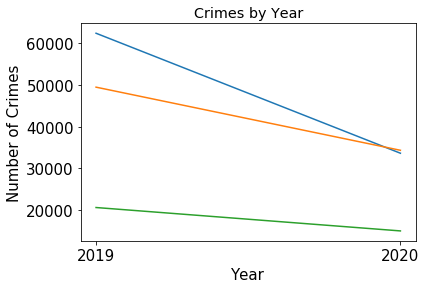

In [100]:
fig, ax = plt.subplots()

plt.rcParams.update({'font.size': 12}) # or you could update all the font sizes at once

ax.plot('Year', 'COUNT', data=by_year[by_year['Primary Type']=='THEFT'])
ax.plot('Year', 'COUNT', data=by_year[by_year['Primary Type']=='BATTERY'])
ax.plot('Year', 'COUNT', data=by_year[by_year['Primary Type']=='ASSAULT'])
ax.set_title('Crimes by Year')
ax.set_ylabel('Number of Crimes');
ax.set_xlabel('Year')